# Notes

Analyses impact factors to subhalos traversed by TNG300-1 pipes. Code adapts both work developed for subhalo tracing: raven:/u/cwalker/Illustris_Zhang_Method/Paper_Plots_subhalo_tracing.ipynb and DM analysis: raven:/u/cwalker/Illustris_Zhang_Method/Paper_Plots_DMs.ipynb and impact analysis: raven:/u/cwalker/Illustris_Zhang_Method/Pipe_LSS_Analysis_5.ipynb and raven:/u/cwalker/Illustris_Zhang_Method/Pipe_Creation_Plus_LSS_8.ipynb

The output data per snapshot, per pipe, will be the impact factors to:

- Non- -1 subhalos traversed by the pipe
- Of which are defined as galaxies by having a stellar mass > 0
- Of which are well-resolved galaxies, by having > 100 star particles

I think the units of these impact factors are code units (ckpc/h)

These data will be stored at: /u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output
The output data will be plotted at: /u/cwalker/Illustris_Zhang_Method/Paper_Plots_Subhalo_Impact_Factor_Tracing.ipynb

- The pipes were created by: raven:/u/cwalker/Illustris_Zhang_Method/batch_jobs/batch_scripts/make_pipes_5.py
- They are stored at: /u/cwalker/Illustris_Zhang_Method/SpeedTempTest/
- They are backed up at: /ptmp/cwalker/Illustris_FRB_Project/Zhang_backups/pipes/TNG300-1_WHIM_backup_new
- They had placeholder subhalo ID numbers. The true subhalo ID lists for these pipes were created by: Illustris_Zhang_Method/batch_jobs/batch_scripts/get_subhaloIDs_1.py
- These lists are stored at: /u/cwalker/Illustris_Zhang_Method/SpeedTempTest/
- They were created using matchlists created by /u/cwalker/Illustris_Zhang_Method/Create_Particle_Subhalo_Matchlists_5.ipynb
- These matchlists are backed up at: /ptmp/cwalker/Illustris_FRB_Project/Sim_Matchlists/




# Imports

In [127]:
import os
import numpy as np
import illustris_python as il
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Begin (single snapshot test)

## Initialise

In [255]:
#choose simulation to process
sim_to_process = 'TNG300-1'

#number of pipes which were created
npipes = 5125

#choose snapshots to process
snaps_to_process = [17]

#simulation data path
basePath = '/virgotng/universe/IllustrisTNG/{0}/output/'.format(sim_to_process)

#pipe data location
pipe_data_loc = '/ptmp/cwalker/Illustris_FRB_Project/Zhang_backups/pipes/{0}_WHIM_backup_new/'.format(sim_to_process)

#subhalo id list data locations

shID_lists_loc = '/u/cwalker/Illustris_Zhang_Method/SpeedTempTest/'

## Load all data necessary for impact factor analysis

In [256]:


#loop over snapshots
for i in range(len(snaps_to_process)):
    
    #get snapshot number
    snap_number = snaps_to_process[i]
    
    #pipe data file name
    pipe_data_file = 'Sim_{0}_Snap_{1}_dDMdz_Output_SpeedTempTest.npy'.format(sim_to_process,snap_number)
    
    #load pipe data
    pipe_data = np.load(pipe_data_loc+pipe_data_file,allow_pickle=True).tolist()
    
    #extract the particle IDs for each pipe
    pipe_pIDs = pipe_data['LoSPartIDs']
    
    #extract the bin coordinates for each pipe
    pipe_bin_coords = pipe_data['LoSBinCoords']
    
    #extract the true coordinates of each cell related to a bin on each pipe
    pipe_cell_coords = pipe_data['LoSCellCoords']
    
    #get the names of the subhalo ID list files for these pipes
    shID_list_files = ['{0}/sim_{1}_snap_{2}_pipe_{3}_true_shID_list.npy'.format(shID_lists_loc,
                                                                                 sim_to_process,
                                                                                 snap_number,
                                                                                 i) for i in np.arange(npipes)]
    
    #initialise array to hold the subhalo ID lists for these pipes
    pipe_shIDs = []
    
    #loop over the subhalo ID files, load the data
    for j in range(len(shID_list_files)):
        
        #get the subhalo ID file path and name
        shID_file = shID_list_files[j]
        
        #load and append the data to array
        pipe_shIDs.append(np.load(shID_file))
        
        
        
    
    
    

## Check data lengths

In [257]:
print('number of pipes: {0},'.format(len(pipe_pIDs)), 'bins per pipe: {0}'.format(len(pipe_pIDs[0])))
print(len(pipe_shIDs), len(pipe_shIDs[0]))
print(len(pipe_cell_coords), len(pipe_cell_coords[0]))
print(len(pipe_bin_coords), len(pipe_bin_coords[0]))

number of pipes: 5125, bins per pipe: 10000
5125 10000
5125 10000
5125 10000


## Calculate and plot the impact factor for a single pipe as a test

Central position of subhalo 2113632.0: [ 33509.324 193112.19  168501.8  ]
coordinates of minimum distance: [33509.324, 193115.71621630128, 168523.89586645202]


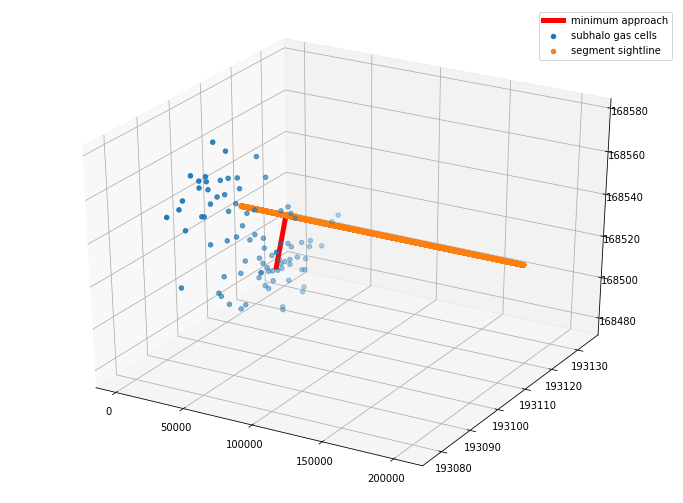

Central position of subhalo 2469299.0: [ 74038.28 193139.47 168548.75]
coordinates of minimum distance: [74038.28, 193115.71621630128, 168523.89586645202]


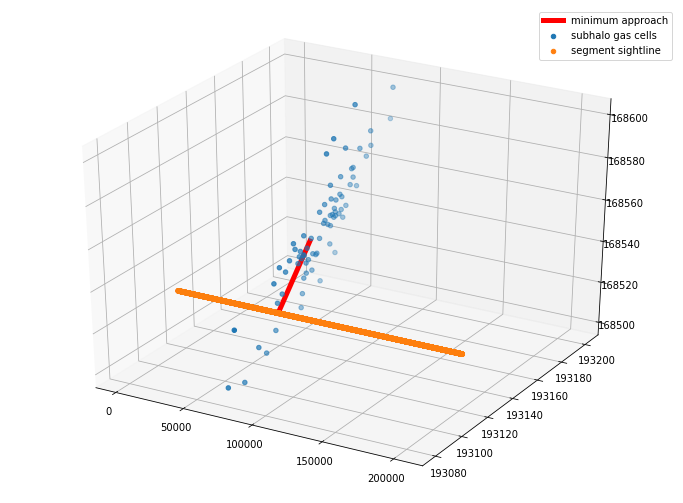

Central position of subhalo 10012039.0: [146555.38 193153.75 168519.39]
coordinates of minimum distance: [146555.38, 193115.71621630128, 168523.89586645202]


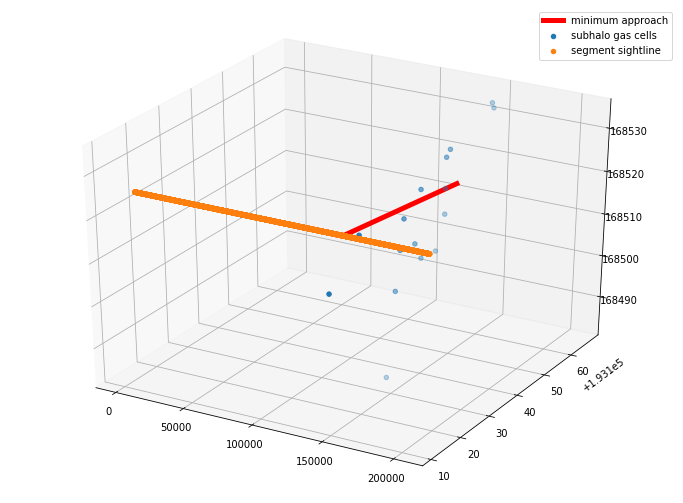

subhalos [2113632.0, 2469299.0, 10012039.0]
galaxies [2113632.0]
well-resolved []
[[33509.324, 193115.71621630128, 168523.89586645202], [74038.28, 193115.71621630128, 168523.89586645202], [146555.38, 193115.71621630128, 168523.89586645202]]
minimum distances: [22.37894684589291, 34.37892976125921, 38.29968541622408]


In [258]:
#initialise arrays to hold minimum distances from sightlines to subhalos impact factors
sh_minDists = [] #unique non- -1 subhalos
gal_minDists = [] #galaxies
wrg_minDists = [] #well-resolved galaxies

#loop over pipes
for i in range(npipes):
    
    if i == 3: #check only first pipe to begin
        
        #load the data for this pipe
        bin_coords = pipe_bin_coords[i] #coordinates of bins along the line of sight
        cell_coords = pipe_cell_coords[i] #coordinaates of cells associated with these bins
        pIDs = pipe_pIDs[i] #particle IDs associated with these cells
        shIDs = pipe_shIDs[i] #subhalo IDs associated with these cells
        
        #get unique subhalos traversed by this pipe
        uq_shIDs = np.unique(shIDs)
        
        #select unique subhalos which are not -1
        uq_shIDs = [shID for shID in uq_shIDs if shID!=-1]
        
        #get the coordinates of minimum distance to these subhalos.
        #this is where the los coordinate's (i.e. the bin coordinate's) x component
        #is equal to the subhalo center's x coordinate. y and z will always be the same
        #for the sightline.
        
        #initialise arrays
        minDist_coords = [] #array to hold coordinates of minimum distance to the subhalos
        minDists = [] #array to hold the minimum distances to the subhalos
        
        #loop over subhalos
        for j in range(len(uq_shIDs)):
            
            #get subhalo ID
            shID = uq_shIDs[j]
            
            #load the subhalo data
            sh_data = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID)
            
            #get the central position of the subhalo [code units = ckpc/h]
            sh_centpos = sh_data['SubhaloPos']
            print('Central position of subhalo {0}: {1}'.format(shID,sh_centpos))
            
            #get the coordinates of minimum distance [code units = ckpc/h]
            minDist_xyz = [sh_centpos[0],bin_coords[0][1],bin_coords[0][2]]
            print('coordinates of minimum distance: {0}'.format(minDist_xyz))
            
            #get the coordinates of gas cells associated witht the subhalo
            sh_gas_coords = il.snapshot.loadSubhalo(basePath, snap_number, shID, 'gas', fields=None)['Coordinates']
            #print('Gas coordinates of this subhalo: {0}'.format(sh_gas_coords))
            
            #plot the subhalo data
            fig = plt.figure(figsize=(12,9))
            ax=fig.add_subplot(111,projection='3d')
            ax.scatter3D(sh_gas_coords[:,0],sh_gas_coords[:,1],sh_gas_coords[:,2],label='subhalo gas cells') #the subhalo
            ax.scatter3D(bin_coords[:,0],bin_coords[:,1],bin_coords[:,2],label = 'segment sightline') #the los
            ax.plot(list(zip(sh_centpos,minDist_xyz))[0],
                    list(zip(sh_centpos,minDist_xyz))[1],
                    list(zip(sh_centpos,minDist_xyz))[2],
                   color='r',lw=5,label='minimum approach') #the impact factor
            plt.legend()
            plt.show()

            #append to array
            minDist_coords.append(minDist_xyz)
            
            #calculate the minimum distance [code units = ckpc/h]
            minDist = np.sqrt(((minDist_xyz[0]-sh_centpos[0])**2) +\
                              ((minDist_xyz[1]-sh_centpos[1])**2) +\
                              ((minDist_xyz[2]-sh_centpos[2])**2))
            #append to array
            minDists.append(minDist)
         
        #get unique subhalos which are galaxies (i.e. stellar mass > 0)
        gal_shIDs = [shID for shID in uq_shIDs if\
                     il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID)['SubhaloMassType'][4]>0]
        
        #get unique subhalos which are well-resolved galaxies (i.e. containing >100 star particles)
        wrg_shIDs = [shID for shID in uq_shIDs if\
                     il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID)['SubhaloLenType'][4]>100]
        

        
        print('subhalos',uq_shIDs)
        print('galaxies',gal_shIDs)
        print('well-resolved',wrg_shIDs)
        print(minDist_coords)
        print('minimum distances: {0}'.format(minDists))
        


## Calculate impact factors for every pipe in the snapshot

In [259]:
print('Snapshot being processed: {0}'.format(snap_number))

Snapshot being processed: 17


In [260]:
#initialise arrays to hold minimum distances from sightlines to subhalos impact factors
sh_ids_tostore_all = [] #array to hold the unique subhalo IDs which are not -1 which will
                    #be stored in separate files to be analysed during DM impact factor
                    #analysis
sh_minDists_all = [] #unique non- -1 subhalos
gal_minDists_all = [] #galaxies
wrg_minDists_all = [] #well-resolved galaxies

#loop over pipes
for i in range(npipes):
    
    print('Processing pipe: {0} for snapshot {1} for sim {2}'.format(i,snap_number,sim_to_process))

            
    #load the data for this pipe
    bin_coords = pipe_bin_coords[i] #coordinates of bins along the line of sight
    cell_coords = pipe_cell_coords[i] #coordinaates of cells associated with these bins
    pIDs = pipe_pIDs[i] #particle IDs associated with these cells
    shIDs = pipe_shIDs[i] #subhalo IDs associated with these cells

    #get unique subhalos traversed by this pipe
    uq_shIDs = np.unique(shIDs)

    #select unique subhalos which are not -1
    uq_shIDs = [shID for shID in uq_shIDs if shID!=-1]

    #get the coordinates of minimum distance to these subhalos.
    #this is where the los coordinate's (i.e. the bin coordinate's) x component
    #is equal to the subhalo center's x coordinate. y and z will always be the same
    #for the sightline.

    #initialise arrays
    sh_ids_tostore = [] #array to hold the unique subhalo IDs which are not -1 which will
                        #be stored in separate files to be analysed during DM impact factor
                        #analysis
    sh_minDist_coords = [] #array to hold coordinates of minimum distance to the subhalos
    sh_minDists = [] #array to hold the minimum distances to the subhalos
    gal_minDists = [] #array to hold min distances to galaxies
    wrg_minDists = [] #array to hold min distances to well-resolved galaxies

    #loop over subhalos
    for j in range(len(uq_shIDs)):
        
        #get subhalo ID
        shID = uq_shIDs[j]

        #load the subhalo data
        sh_data = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID)

        #get the central position of the subhalo [code units = ckpc/h]
        sh_centpos = sh_data['SubhaloPos']
        #print('Central position of subhalo {0}: {1}'.format(shID,sh_centpos))

        #get the coordinates of minimum distance [code units = ckpc/h]
        minDist_xyz = [sh_centpos[0],bin_coords[0][1],bin_coords[0][2]]
        #print('coordinates of minimum distance: {0}'.format(minDist_xyz))

        #get the coordinates of gas cells associated witht the ssubhalo
        sh_gas_coords = il.snapshot.loadSubhalo(basePath, snap_number, shID, 'gas', fields=None)['Coordinates']
        #print('Gas coordinates of this subhalo: {0}'.format(sh_gas_coords))

        #append to array
        sh_minDist_coords.append(minDist_xyz)

        #calculate the minimum distance [code units = ckpc/h]
        minDist = np.sqrt(((minDist_xyz[0]-sh_centpos[0])**2) +\
                          ((minDist_xyz[1]-sh_centpos[1])**2) +\
                          ((minDist_xyz[2]-sh_centpos[2])**2))
        #append to array
        sh_minDists.append(minDist)
        sh_ids_tostore.append(shID)
        
        #if it is a galaxy (i.e. stellar mass > 0) append to array
        if il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID)['SubhaloMassType'][4]>0:
            gal_minDists.append(minDist)
        
        #if it is a well-resolved galaxy (i.e. containing >100 star particles) append to array
        if il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID)['SubhaloLenType'][4]>100:
            wrg_minDists.append(minDist)
        
    #append to arrays for all pipes
    sh_ids_tostore_all.append(sh_ids_tostore) #the unique non-1 subhalos for DM-impact factor analysis
    sh_minDists_all.append(sh_minDists) #impact factors for the unique non -1 subhalos
    gal_minDists_all.append(gal_minDists) #galaxies
    wrg_minDists_all.append(wrg_minDists) #well-resolved galaxies
    


Processing pipe: 0 for snapshot 17 for sim TNG300-1
Processing pipe: 1 for snapshot 17 for sim TNG300-1
Processing pipe: 2 for snapshot 17 for sim TNG300-1
Processing pipe: 3 for snapshot 17 for sim TNG300-1
Processing pipe: 4 for snapshot 17 for sim TNG300-1
Processing pipe: 5 for snapshot 17 for sim TNG300-1
Processing pipe: 6 for snapshot 17 for sim TNG300-1
Processing pipe: 7 for snapshot 17 for sim TNG300-1
Processing pipe: 8 for snapshot 17 for sim TNG300-1
Processing pipe: 9 for snapshot 17 for sim TNG300-1
Processing pipe: 10 for snapshot 17 for sim TNG300-1
Processing pipe: 11 for snapshot 17 for sim TNG300-1
Processing pipe: 12 for snapshot 17 for sim TNG300-1
Processing pipe: 13 for snapshot 17 for sim TNG300-1
Processing pipe: 14 for snapshot 17 for sim TNG300-1
Processing pipe: 15 for snapshot 17 for sim TNG300-1
Processing pipe: 16 for snapshot 17 for sim TNG300-1
Processing pipe: 17 for snapshot 17 for sim TNG300-1
Processing pipe: 18 for snapshot 17 for sim TNG300-1
Pro

Processing pipe: 154 for snapshot 17 for sim TNG300-1
Processing pipe: 155 for snapshot 17 for sim TNG300-1
Processing pipe: 156 for snapshot 17 for sim TNG300-1
Processing pipe: 157 for snapshot 17 for sim TNG300-1
Processing pipe: 158 for snapshot 17 for sim TNG300-1
Processing pipe: 159 for snapshot 17 for sim TNG300-1
Processing pipe: 160 for snapshot 17 for sim TNG300-1
Processing pipe: 161 for snapshot 17 for sim TNG300-1
Processing pipe: 162 for snapshot 17 for sim TNG300-1
Processing pipe: 163 for snapshot 17 for sim TNG300-1
Processing pipe: 164 for snapshot 17 for sim TNG300-1
Processing pipe: 165 for snapshot 17 for sim TNG300-1
Processing pipe: 166 for snapshot 17 for sim TNG300-1
Processing pipe: 167 for snapshot 17 for sim TNG300-1
Processing pipe: 168 for snapshot 17 for sim TNG300-1
Processing pipe: 169 for snapshot 17 for sim TNG300-1
Processing pipe: 170 for snapshot 17 for sim TNG300-1
Processing pipe: 171 for snapshot 17 for sim TNG300-1
Processing pipe: 172 for sna

Processing pipe: 306 for snapshot 17 for sim TNG300-1
Processing pipe: 307 for snapshot 17 for sim TNG300-1
Processing pipe: 308 for snapshot 17 for sim TNG300-1
Processing pipe: 309 for snapshot 17 for sim TNG300-1
Processing pipe: 310 for snapshot 17 for sim TNG300-1
Processing pipe: 311 for snapshot 17 for sim TNG300-1
Processing pipe: 312 for snapshot 17 for sim TNG300-1
Processing pipe: 313 for snapshot 17 for sim TNG300-1
Processing pipe: 314 for snapshot 17 for sim TNG300-1
Processing pipe: 315 for snapshot 17 for sim TNG300-1
Processing pipe: 316 for snapshot 17 for sim TNG300-1
Processing pipe: 317 for snapshot 17 for sim TNG300-1
Processing pipe: 318 for snapshot 17 for sim TNG300-1
Processing pipe: 319 for snapshot 17 for sim TNG300-1
Processing pipe: 320 for snapshot 17 for sim TNG300-1
Processing pipe: 321 for snapshot 17 for sim TNG300-1
Processing pipe: 322 for snapshot 17 for sim TNG300-1
Processing pipe: 323 for snapshot 17 for sim TNG300-1
Processing pipe: 324 for sna

Processing pipe: 458 for snapshot 17 for sim TNG300-1
Processing pipe: 459 for snapshot 17 for sim TNG300-1
Processing pipe: 460 for snapshot 17 for sim TNG300-1
Processing pipe: 461 for snapshot 17 for sim TNG300-1
Processing pipe: 462 for snapshot 17 for sim TNG300-1
Processing pipe: 463 for snapshot 17 for sim TNG300-1
Processing pipe: 464 for snapshot 17 for sim TNG300-1
Processing pipe: 465 for snapshot 17 for sim TNG300-1
Processing pipe: 466 for snapshot 17 for sim TNG300-1
Processing pipe: 467 for snapshot 17 for sim TNG300-1
Processing pipe: 468 for snapshot 17 for sim TNG300-1
Processing pipe: 469 for snapshot 17 for sim TNG300-1
Processing pipe: 470 for snapshot 17 for sim TNG300-1
Processing pipe: 471 for snapshot 17 for sim TNG300-1
Processing pipe: 472 for snapshot 17 for sim TNG300-1
Processing pipe: 473 for snapshot 17 for sim TNG300-1
Processing pipe: 474 for snapshot 17 for sim TNG300-1
Processing pipe: 475 for snapshot 17 for sim TNG300-1
Processing pipe: 476 for sna

Processing pipe: 610 for snapshot 17 for sim TNG300-1
Processing pipe: 611 for snapshot 17 for sim TNG300-1
Processing pipe: 612 for snapshot 17 for sim TNG300-1
Processing pipe: 613 for snapshot 17 for sim TNG300-1
Processing pipe: 614 for snapshot 17 for sim TNG300-1
Processing pipe: 615 for snapshot 17 for sim TNG300-1
Processing pipe: 616 for snapshot 17 for sim TNG300-1
Processing pipe: 617 for snapshot 17 for sim TNG300-1
Processing pipe: 618 for snapshot 17 for sim TNG300-1
Processing pipe: 619 for snapshot 17 for sim TNG300-1
Processing pipe: 620 for snapshot 17 for sim TNG300-1
Processing pipe: 621 for snapshot 17 for sim TNG300-1
Processing pipe: 622 for snapshot 17 for sim TNG300-1
Processing pipe: 623 for snapshot 17 for sim TNG300-1
Processing pipe: 624 for snapshot 17 for sim TNG300-1
Processing pipe: 625 for snapshot 17 for sim TNG300-1
Processing pipe: 626 for snapshot 17 for sim TNG300-1
Processing pipe: 627 for snapshot 17 for sim TNG300-1
Processing pipe: 628 for sna

Processing pipe: 762 for snapshot 17 for sim TNG300-1
Processing pipe: 763 for snapshot 17 for sim TNG300-1
Processing pipe: 764 for snapshot 17 for sim TNG300-1
Processing pipe: 765 for snapshot 17 for sim TNG300-1
Processing pipe: 766 for snapshot 17 for sim TNG300-1
Processing pipe: 767 for snapshot 17 for sim TNG300-1
Processing pipe: 768 for snapshot 17 for sim TNG300-1
Processing pipe: 769 for snapshot 17 for sim TNG300-1
Processing pipe: 770 for snapshot 17 for sim TNG300-1
Processing pipe: 771 for snapshot 17 for sim TNG300-1
Processing pipe: 772 for snapshot 17 for sim TNG300-1
Processing pipe: 773 for snapshot 17 for sim TNG300-1
Processing pipe: 774 for snapshot 17 for sim TNG300-1
Processing pipe: 775 for snapshot 17 for sim TNG300-1
Processing pipe: 776 for snapshot 17 for sim TNG300-1
Processing pipe: 777 for snapshot 17 for sim TNG300-1
Processing pipe: 778 for snapshot 17 for sim TNG300-1
Processing pipe: 779 for snapshot 17 for sim TNG300-1
Processing pipe: 780 for sna

Processing pipe: 914 for snapshot 17 for sim TNG300-1
Processing pipe: 915 for snapshot 17 for sim TNG300-1
Processing pipe: 916 for snapshot 17 for sim TNG300-1
Processing pipe: 917 for snapshot 17 for sim TNG300-1
Processing pipe: 918 for snapshot 17 for sim TNG300-1
Processing pipe: 919 for snapshot 17 for sim TNG300-1
Processing pipe: 920 for snapshot 17 for sim TNG300-1
Processing pipe: 921 for snapshot 17 for sim TNG300-1
Processing pipe: 922 for snapshot 17 for sim TNG300-1
Processing pipe: 923 for snapshot 17 for sim TNG300-1
Processing pipe: 924 for snapshot 17 for sim TNG300-1
Processing pipe: 925 for snapshot 17 for sim TNG300-1
Processing pipe: 926 for snapshot 17 for sim TNG300-1
Processing pipe: 927 for snapshot 17 for sim TNG300-1
Processing pipe: 928 for snapshot 17 for sim TNG300-1
Processing pipe: 929 for snapshot 17 for sim TNG300-1
Processing pipe: 930 for snapshot 17 for sim TNG300-1
Processing pipe: 931 for snapshot 17 for sim TNG300-1
Processing pipe: 932 for sna

Processing pipe: 1065 for snapshot 17 for sim TNG300-1
Processing pipe: 1066 for snapshot 17 for sim TNG300-1
Processing pipe: 1067 for snapshot 17 for sim TNG300-1
Processing pipe: 1068 for snapshot 17 for sim TNG300-1
Processing pipe: 1069 for snapshot 17 for sim TNG300-1
Processing pipe: 1070 for snapshot 17 for sim TNG300-1
Processing pipe: 1071 for snapshot 17 for sim TNG300-1
Processing pipe: 1072 for snapshot 17 for sim TNG300-1
Processing pipe: 1073 for snapshot 17 for sim TNG300-1
Processing pipe: 1074 for snapshot 17 for sim TNG300-1
Processing pipe: 1075 for snapshot 17 for sim TNG300-1
Processing pipe: 1076 for snapshot 17 for sim TNG300-1
Processing pipe: 1077 for snapshot 17 for sim TNG300-1
Processing pipe: 1078 for snapshot 17 for sim TNG300-1
Processing pipe: 1079 for snapshot 17 for sim TNG300-1
Processing pipe: 1080 for snapshot 17 for sim TNG300-1
Processing pipe: 1081 for snapshot 17 for sim TNG300-1
Processing pipe: 1082 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 1214 for snapshot 17 for sim TNG300-1
Processing pipe: 1215 for snapshot 17 for sim TNG300-1
Processing pipe: 1216 for snapshot 17 for sim TNG300-1
Processing pipe: 1217 for snapshot 17 for sim TNG300-1
Processing pipe: 1218 for snapshot 17 for sim TNG300-1
Processing pipe: 1219 for snapshot 17 for sim TNG300-1
Processing pipe: 1220 for snapshot 17 for sim TNG300-1
Processing pipe: 1221 for snapshot 17 for sim TNG300-1
Processing pipe: 1222 for snapshot 17 for sim TNG300-1
Processing pipe: 1223 for snapshot 17 for sim TNG300-1
Processing pipe: 1224 for snapshot 17 for sim TNG300-1
Processing pipe: 1225 for snapshot 17 for sim TNG300-1
Processing pipe: 1226 for snapshot 17 for sim TNG300-1
Processing pipe: 1227 for snapshot 17 for sim TNG300-1
Processing pipe: 1228 for snapshot 17 for sim TNG300-1
Processing pipe: 1229 for snapshot 17 for sim TNG300-1
Processing pipe: 1230 for snapshot 17 for sim TNG300-1
Processing pipe: 1231 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 1364 for snapshot 17 for sim TNG300-1
Processing pipe: 1365 for snapshot 17 for sim TNG300-1
Processing pipe: 1366 for snapshot 17 for sim TNG300-1
Processing pipe: 1367 for snapshot 17 for sim TNG300-1
Processing pipe: 1368 for snapshot 17 for sim TNG300-1
Processing pipe: 1369 for snapshot 17 for sim TNG300-1
Processing pipe: 1370 for snapshot 17 for sim TNG300-1
Processing pipe: 1371 for snapshot 17 for sim TNG300-1
Processing pipe: 1372 for snapshot 17 for sim TNG300-1
Processing pipe: 1373 for snapshot 17 for sim TNG300-1
Processing pipe: 1374 for snapshot 17 for sim TNG300-1
Processing pipe: 1375 for snapshot 17 for sim TNG300-1
Processing pipe: 1376 for snapshot 17 for sim TNG300-1
Processing pipe: 1377 for snapshot 17 for sim TNG300-1
Processing pipe: 1378 for snapshot 17 for sim TNG300-1
Processing pipe: 1379 for snapshot 17 for sim TNG300-1
Processing pipe: 1380 for snapshot 17 for sim TNG300-1
Processing pipe: 1381 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 1513 for snapshot 17 for sim TNG300-1
Processing pipe: 1514 for snapshot 17 for sim TNG300-1
Processing pipe: 1515 for snapshot 17 for sim TNG300-1
Processing pipe: 1516 for snapshot 17 for sim TNG300-1
Processing pipe: 1517 for snapshot 17 for sim TNG300-1
Processing pipe: 1518 for snapshot 17 for sim TNG300-1
Processing pipe: 1519 for snapshot 17 for sim TNG300-1
Processing pipe: 1520 for snapshot 17 for sim TNG300-1
Processing pipe: 1521 for snapshot 17 for sim TNG300-1
Processing pipe: 1522 for snapshot 17 for sim TNG300-1
Processing pipe: 1523 for snapshot 17 for sim TNG300-1
Processing pipe: 1524 for snapshot 17 for sim TNG300-1
Processing pipe: 1525 for snapshot 17 for sim TNG300-1
Processing pipe: 1526 for snapshot 17 for sim TNG300-1
Processing pipe: 1527 for snapshot 17 for sim TNG300-1
Processing pipe: 1528 for snapshot 17 for sim TNG300-1
Processing pipe: 1529 for snapshot 17 for sim TNG300-1
Processing pipe: 1530 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 1662 for snapshot 17 for sim TNG300-1
Processing pipe: 1663 for snapshot 17 for sim TNG300-1
Processing pipe: 1664 for snapshot 17 for sim TNG300-1
Processing pipe: 1665 for snapshot 17 for sim TNG300-1
Processing pipe: 1666 for snapshot 17 for sim TNG300-1
Processing pipe: 1667 for snapshot 17 for sim TNG300-1
Processing pipe: 1668 for snapshot 17 for sim TNG300-1
Processing pipe: 1669 for snapshot 17 for sim TNG300-1
Processing pipe: 1670 for snapshot 17 for sim TNG300-1
Processing pipe: 1671 for snapshot 17 for sim TNG300-1
Processing pipe: 1672 for snapshot 17 for sim TNG300-1
Processing pipe: 1673 for snapshot 17 for sim TNG300-1
Processing pipe: 1674 for snapshot 17 for sim TNG300-1
Processing pipe: 1675 for snapshot 17 for sim TNG300-1
Processing pipe: 1676 for snapshot 17 for sim TNG300-1
Processing pipe: 1677 for snapshot 17 for sim TNG300-1
Processing pipe: 1678 for snapshot 17 for sim TNG300-1
Processing pipe: 1679 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 1811 for snapshot 17 for sim TNG300-1
Processing pipe: 1812 for snapshot 17 for sim TNG300-1
Processing pipe: 1813 for snapshot 17 for sim TNG300-1
Processing pipe: 1814 for snapshot 17 for sim TNG300-1
Processing pipe: 1815 for snapshot 17 for sim TNG300-1
Processing pipe: 1816 for snapshot 17 for sim TNG300-1
Processing pipe: 1817 for snapshot 17 for sim TNG300-1
Processing pipe: 1818 for snapshot 17 for sim TNG300-1
Processing pipe: 1819 for snapshot 17 for sim TNG300-1
Processing pipe: 1820 for snapshot 17 for sim TNG300-1
Processing pipe: 1821 for snapshot 17 for sim TNG300-1
Processing pipe: 1822 for snapshot 17 for sim TNG300-1
Processing pipe: 1823 for snapshot 17 for sim TNG300-1
Processing pipe: 1824 for snapshot 17 for sim TNG300-1
Processing pipe: 1825 for snapshot 17 for sim TNG300-1
Processing pipe: 1826 for snapshot 17 for sim TNG300-1
Processing pipe: 1827 for snapshot 17 for sim TNG300-1
Processing pipe: 1828 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 1960 for snapshot 17 for sim TNG300-1
Processing pipe: 1961 for snapshot 17 for sim TNG300-1
Processing pipe: 1962 for snapshot 17 for sim TNG300-1
Processing pipe: 1963 for snapshot 17 for sim TNG300-1
Processing pipe: 1964 for snapshot 17 for sim TNG300-1
Processing pipe: 1965 for snapshot 17 for sim TNG300-1
Processing pipe: 1966 for snapshot 17 for sim TNG300-1
Processing pipe: 1967 for snapshot 17 for sim TNG300-1
Processing pipe: 1968 for snapshot 17 for sim TNG300-1
Processing pipe: 1969 for snapshot 17 for sim TNG300-1
Processing pipe: 1970 for snapshot 17 for sim TNG300-1
Processing pipe: 1971 for snapshot 17 for sim TNG300-1
Processing pipe: 1972 for snapshot 17 for sim TNG300-1
Processing pipe: 1973 for snapshot 17 for sim TNG300-1
Processing pipe: 1974 for snapshot 17 for sim TNG300-1
Processing pipe: 1975 for snapshot 17 for sim TNG300-1
Processing pipe: 1976 for snapshot 17 for sim TNG300-1
Processing pipe: 1977 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 2109 for snapshot 17 for sim TNG300-1
Processing pipe: 2110 for snapshot 17 for sim TNG300-1
Processing pipe: 2111 for snapshot 17 for sim TNG300-1
Processing pipe: 2112 for snapshot 17 for sim TNG300-1
Processing pipe: 2113 for snapshot 17 for sim TNG300-1
Processing pipe: 2114 for snapshot 17 for sim TNG300-1
Processing pipe: 2115 for snapshot 17 for sim TNG300-1
Processing pipe: 2116 for snapshot 17 for sim TNG300-1
Processing pipe: 2117 for snapshot 17 for sim TNG300-1
Processing pipe: 2118 for snapshot 17 for sim TNG300-1
Processing pipe: 2119 for snapshot 17 for sim TNG300-1
Processing pipe: 2120 for snapshot 17 for sim TNG300-1
Processing pipe: 2121 for snapshot 17 for sim TNG300-1
Processing pipe: 2122 for snapshot 17 for sim TNG300-1
Processing pipe: 2123 for snapshot 17 for sim TNG300-1
Processing pipe: 2124 for snapshot 17 for sim TNG300-1
Processing pipe: 2125 for snapshot 17 for sim TNG300-1
Processing pipe: 2126 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 2258 for snapshot 17 for sim TNG300-1
Processing pipe: 2259 for snapshot 17 for sim TNG300-1
Processing pipe: 2260 for snapshot 17 for sim TNG300-1
Processing pipe: 2261 for snapshot 17 for sim TNG300-1
Processing pipe: 2262 for snapshot 17 for sim TNG300-1
Processing pipe: 2263 for snapshot 17 for sim TNG300-1
Processing pipe: 2264 for snapshot 17 for sim TNG300-1
Processing pipe: 2265 for snapshot 17 for sim TNG300-1
Processing pipe: 2266 for snapshot 17 for sim TNG300-1
Processing pipe: 2267 for snapshot 17 for sim TNG300-1
Processing pipe: 2268 for snapshot 17 for sim TNG300-1
Processing pipe: 2269 for snapshot 17 for sim TNG300-1
Processing pipe: 2270 for snapshot 17 for sim TNG300-1
Processing pipe: 2271 for snapshot 17 for sim TNG300-1
Processing pipe: 2272 for snapshot 17 for sim TNG300-1
Processing pipe: 2273 for snapshot 17 for sim TNG300-1
Processing pipe: 2274 for snapshot 17 for sim TNG300-1
Processing pipe: 2275 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 2407 for snapshot 17 for sim TNG300-1
Processing pipe: 2408 for snapshot 17 for sim TNG300-1
Processing pipe: 2409 for snapshot 17 for sim TNG300-1
Processing pipe: 2410 for snapshot 17 for sim TNG300-1
Processing pipe: 2411 for snapshot 17 for sim TNG300-1
Processing pipe: 2412 for snapshot 17 for sim TNG300-1
Processing pipe: 2413 for snapshot 17 for sim TNG300-1
Processing pipe: 2414 for snapshot 17 for sim TNG300-1
Processing pipe: 2415 for snapshot 17 for sim TNG300-1
Processing pipe: 2416 for snapshot 17 for sim TNG300-1
Processing pipe: 2417 for snapshot 17 for sim TNG300-1
Processing pipe: 2418 for snapshot 17 for sim TNG300-1
Processing pipe: 2419 for snapshot 17 for sim TNG300-1
Processing pipe: 2420 for snapshot 17 for sim TNG300-1
Processing pipe: 2421 for snapshot 17 for sim TNG300-1
Processing pipe: 2422 for snapshot 17 for sim TNG300-1
Processing pipe: 2423 for snapshot 17 for sim TNG300-1
Processing pipe: 2424 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 2556 for snapshot 17 for sim TNG300-1
Processing pipe: 2557 for snapshot 17 for sim TNG300-1
Processing pipe: 2558 for snapshot 17 for sim TNG300-1
Processing pipe: 2559 for snapshot 17 for sim TNG300-1
Processing pipe: 2560 for snapshot 17 for sim TNG300-1
Processing pipe: 2561 for snapshot 17 for sim TNG300-1
Processing pipe: 2562 for snapshot 17 for sim TNG300-1
Processing pipe: 2563 for snapshot 17 for sim TNG300-1
Processing pipe: 2564 for snapshot 17 for sim TNG300-1
Processing pipe: 2565 for snapshot 17 for sim TNG300-1
Processing pipe: 2566 for snapshot 17 for sim TNG300-1
Processing pipe: 2567 for snapshot 17 for sim TNG300-1
Processing pipe: 2568 for snapshot 17 for sim TNG300-1
Processing pipe: 2569 for snapshot 17 for sim TNG300-1
Processing pipe: 2570 for snapshot 17 for sim TNG300-1
Processing pipe: 2571 for snapshot 17 for sim TNG300-1
Processing pipe: 2572 for snapshot 17 for sim TNG300-1
Processing pipe: 2573 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 2705 for snapshot 17 for sim TNG300-1
Processing pipe: 2706 for snapshot 17 for sim TNG300-1
Processing pipe: 2707 for snapshot 17 for sim TNG300-1
Processing pipe: 2708 for snapshot 17 for sim TNG300-1
Processing pipe: 2709 for snapshot 17 for sim TNG300-1
Processing pipe: 2710 for snapshot 17 for sim TNG300-1
Processing pipe: 2711 for snapshot 17 for sim TNG300-1
Processing pipe: 2712 for snapshot 17 for sim TNG300-1
Processing pipe: 2713 for snapshot 17 for sim TNG300-1
Processing pipe: 2714 for snapshot 17 for sim TNG300-1
Processing pipe: 2715 for snapshot 17 for sim TNG300-1
Processing pipe: 2716 for snapshot 17 for sim TNG300-1
Processing pipe: 2717 for snapshot 17 for sim TNG300-1
Processing pipe: 2718 for snapshot 17 for sim TNG300-1
Processing pipe: 2719 for snapshot 17 for sim TNG300-1
Processing pipe: 2720 for snapshot 17 for sim TNG300-1
Processing pipe: 2721 for snapshot 17 for sim TNG300-1
Processing pipe: 2722 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 2854 for snapshot 17 for sim TNG300-1
Processing pipe: 2855 for snapshot 17 for sim TNG300-1
Processing pipe: 2856 for snapshot 17 for sim TNG300-1
Processing pipe: 2857 for snapshot 17 for sim TNG300-1
Processing pipe: 2858 for snapshot 17 for sim TNG300-1
Processing pipe: 2859 for snapshot 17 for sim TNG300-1
Processing pipe: 2860 for snapshot 17 for sim TNG300-1
Processing pipe: 2861 for snapshot 17 for sim TNG300-1
Processing pipe: 2862 for snapshot 17 for sim TNG300-1
Processing pipe: 2863 for snapshot 17 for sim TNG300-1
Processing pipe: 2864 for snapshot 17 for sim TNG300-1
Processing pipe: 2865 for snapshot 17 for sim TNG300-1
Processing pipe: 2866 for snapshot 17 for sim TNG300-1
Processing pipe: 2867 for snapshot 17 for sim TNG300-1
Processing pipe: 2868 for snapshot 17 for sim TNG300-1
Processing pipe: 2869 for snapshot 17 for sim TNG300-1
Processing pipe: 2870 for snapshot 17 for sim TNG300-1
Processing pipe: 2871 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 3003 for snapshot 17 for sim TNG300-1
Processing pipe: 3004 for snapshot 17 for sim TNG300-1
Processing pipe: 3005 for snapshot 17 for sim TNG300-1
Processing pipe: 3006 for snapshot 17 for sim TNG300-1
Processing pipe: 3007 for snapshot 17 for sim TNG300-1
Processing pipe: 3008 for snapshot 17 for sim TNG300-1
Processing pipe: 3009 for snapshot 17 for sim TNG300-1
Processing pipe: 3010 for snapshot 17 for sim TNG300-1
Processing pipe: 3011 for snapshot 17 for sim TNG300-1
Processing pipe: 3012 for snapshot 17 for sim TNG300-1
Processing pipe: 3013 for snapshot 17 for sim TNG300-1
Processing pipe: 3014 for snapshot 17 for sim TNG300-1
Processing pipe: 3015 for snapshot 17 for sim TNG300-1
Processing pipe: 3016 for snapshot 17 for sim TNG300-1
Processing pipe: 3017 for snapshot 17 for sim TNG300-1
Processing pipe: 3018 for snapshot 17 for sim TNG300-1
Processing pipe: 3019 for snapshot 17 for sim TNG300-1
Processing pipe: 3020 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 3152 for snapshot 17 for sim TNG300-1
Processing pipe: 3153 for snapshot 17 for sim TNG300-1
Processing pipe: 3154 for snapshot 17 for sim TNG300-1
Processing pipe: 3155 for snapshot 17 for sim TNG300-1
Processing pipe: 3156 for snapshot 17 for sim TNG300-1
Processing pipe: 3157 for snapshot 17 for sim TNG300-1
Processing pipe: 3158 for snapshot 17 for sim TNG300-1
Processing pipe: 3159 for snapshot 17 for sim TNG300-1
Processing pipe: 3160 for snapshot 17 for sim TNG300-1
Processing pipe: 3161 for snapshot 17 for sim TNG300-1
Processing pipe: 3162 for snapshot 17 for sim TNG300-1
Processing pipe: 3163 for snapshot 17 for sim TNG300-1
Processing pipe: 3164 for snapshot 17 for sim TNG300-1
Processing pipe: 3165 for snapshot 17 for sim TNG300-1
Processing pipe: 3166 for snapshot 17 for sim TNG300-1
Processing pipe: 3167 for snapshot 17 for sim TNG300-1
Processing pipe: 3168 for snapshot 17 for sim TNG300-1
Processing pipe: 3169 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 3301 for snapshot 17 for sim TNG300-1
Processing pipe: 3302 for snapshot 17 for sim TNG300-1
Processing pipe: 3303 for snapshot 17 for sim TNG300-1
Processing pipe: 3304 for snapshot 17 for sim TNG300-1
Processing pipe: 3305 for snapshot 17 for sim TNG300-1
Processing pipe: 3306 for snapshot 17 for sim TNG300-1
Processing pipe: 3307 for snapshot 17 for sim TNG300-1
Processing pipe: 3308 for snapshot 17 for sim TNG300-1
Processing pipe: 3309 for snapshot 17 for sim TNG300-1
Processing pipe: 3310 for snapshot 17 for sim TNG300-1
Processing pipe: 3311 for snapshot 17 for sim TNG300-1
Processing pipe: 3312 for snapshot 17 for sim TNG300-1
Processing pipe: 3313 for snapshot 17 for sim TNG300-1
Processing pipe: 3314 for snapshot 17 for sim TNG300-1
Processing pipe: 3315 for snapshot 17 for sim TNG300-1
Processing pipe: 3316 for snapshot 17 for sim TNG300-1
Processing pipe: 3317 for snapshot 17 for sim TNG300-1
Processing pipe: 3318 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 3451 for snapshot 17 for sim TNG300-1
Processing pipe: 3452 for snapshot 17 for sim TNG300-1
Processing pipe: 3453 for snapshot 17 for sim TNG300-1
Processing pipe: 3454 for snapshot 17 for sim TNG300-1
Processing pipe: 3455 for snapshot 17 for sim TNG300-1
Processing pipe: 3456 for snapshot 17 for sim TNG300-1
Processing pipe: 3457 for snapshot 17 for sim TNG300-1
Processing pipe: 3458 for snapshot 17 for sim TNG300-1
Processing pipe: 3459 for snapshot 17 for sim TNG300-1
Processing pipe: 3460 for snapshot 17 for sim TNG300-1
Processing pipe: 3461 for snapshot 17 for sim TNG300-1
Processing pipe: 3462 for snapshot 17 for sim TNG300-1
Processing pipe: 3463 for snapshot 17 for sim TNG300-1
Processing pipe: 3464 for snapshot 17 for sim TNG300-1
Processing pipe: 3465 for snapshot 17 for sim TNG300-1
Processing pipe: 3466 for snapshot 17 for sim TNG300-1
Processing pipe: 3467 for snapshot 17 for sim TNG300-1
Processing pipe: 3468 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 3600 for snapshot 17 for sim TNG300-1
Processing pipe: 3601 for snapshot 17 for sim TNG300-1
Processing pipe: 3602 for snapshot 17 for sim TNG300-1
Processing pipe: 3603 for snapshot 17 for sim TNG300-1
Processing pipe: 3604 for snapshot 17 for sim TNG300-1
Processing pipe: 3605 for snapshot 17 for sim TNG300-1
Processing pipe: 3606 for snapshot 17 for sim TNG300-1
Processing pipe: 3607 for snapshot 17 for sim TNG300-1
Processing pipe: 3608 for snapshot 17 for sim TNG300-1
Processing pipe: 3609 for snapshot 17 for sim TNG300-1
Processing pipe: 3610 for snapshot 17 for sim TNG300-1
Processing pipe: 3611 for snapshot 17 for sim TNG300-1
Processing pipe: 3612 for snapshot 17 for sim TNG300-1
Processing pipe: 3613 for snapshot 17 for sim TNG300-1
Processing pipe: 3614 for snapshot 17 for sim TNG300-1
Processing pipe: 3615 for snapshot 17 for sim TNG300-1
Processing pipe: 3616 for snapshot 17 for sim TNG300-1
Processing pipe: 3617 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 3749 for snapshot 17 for sim TNG300-1
Processing pipe: 3750 for snapshot 17 for sim TNG300-1
Processing pipe: 3751 for snapshot 17 for sim TNG300-1
Processing pipe: 3752 for snapshot 17 for sim TNG300-1
Processing pipe: 3753 for snapshot 17 for sim TNG300-1
Processing pipe: 3754 for snapshot 17 for sim TNG300-1
Processing pipe: 3755 for snapshot 17 for sim TNG300-1
Processing pipe: 3756 for snapshot 17 for sim TNG300-1
Processing pipe: 3757 for snapshot 17 for sim TNG300-1
Processing pipe: 3758 for snapshot 17 for sim TNG300-1
Processing pipe: 3759 for snapshot 17 for sim TNG300-1
Processing pipe: 3760 for snapshot 17 for sim TNG300-1
Processing pipe: 3761 for snapshot 17 for sim TNG300-1
Processing pipe: 3762 for snapshot 17 for sim TNG300-1
Processing pipe: 3763 for snapshot 17 for sim TNG300-1
Processing pipe: 3764 for snapshot 17 for sim TNG300-1
Processing pipe: 3765 for snapshot 17 for sim TNG300-1
Processing pipe: 3766 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 3898 for snapshot 17 for sim TNG300-1
Processing pipe: 3899 for snapshot 17 for sim TNG300-1
Processing pipe: 3900 for snapshot 17 for sim TNG300-1
Processing pipe: 3901 for snapshot 17 for sim TNG300-1
Processing pipe: 3902 for snapshot 17 for sim TNG300-1
Processing pipe: 3903 for snapshot 17 for sim TNG300-1
Processing pipe: 3904 for snapshot 17 for sim TNG300-1
Processing pipe: 3905 for snapshot 17 for sim TNG300-1
Processing pipe: 3906 for snapshot 17 for sim TNG300-1
Processing pipe: 3907 for snapshot 17 for sim TNG300-1
Processing pipe: 3908 for snapshot 17 for sim TNG300-1
Processing pipe: 3909 for snapshot 17 for sim TNG300-1
Processing pipe: 3910 for snapshot 17 for sim TNG300-1
Processing pipe: 3911 for snapshot 17 for sim TNG300-1
Processing pipe: 3912 for snapshot 17 for sim TNG300-1
Processing pipe: 3913 for snapshot 17 for sim TNG300-1
Processing pipe: 3914 for snapshot 17 for sim TNG300-1
Processing pipe: 3915 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 4047 for snapshot 17 for sim TNG300-1
Processing pipe: 4048 for snapshot 17 for sim TNG300-1
Processing pipe: 4049 for snapshot 17 for sim TNG300-1
Processing pipe: 4050 for snapshot 17 for sim TNG300-1
Processing pipe: 4051 for snapshot 17 for sim TNG300-1
Processing pipe: 4052 for snapshot 17 for sim TNG300-1
Processing pipe: 4053 for snapshot 17 for sim TNG300-1
Processing pipe: 4054 for snapshot 17 for sim TNG300-1
Processing pipe: 4055 for snapshot 17 for sim TNG300-1
Processing pipe: 4056 for snapshot 17 for sim TNG300-1
Processing pipe: 4057 for snapshot 17 for sim TNG300-1
Processing pipe: 4058 for snapshot 17 for sim TNG300-1
Processing pipe: 4059 for snapshot 17 for sim TNG300-1
Processing pipe: 4060 for snapshot 17 for sim TNG300-1
Processing pipe: 4061 for snapshot 17 for sim TNG300-1
Processing pipe: 4062 for snapshot 17 for sim TNG300-1
Processing pipe: 4063 for snapshot 17 for sim TNG300-1
Processing pipe: 4064 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 4197 for snapshot 17 for sim TNG300-1
Processing pipe: 4198 for snapshot 17 for sim TNG300-1
Processing pipe: 4199 for snapshot 17 for sim TNG300-1
Processing pipe: 4200 for snapshot 17 for sim TNG300-1
Processing pipe: 4201 for snapshot 17 for sim TNG300-1
Processing pipe: 4202 for snapshot 17 for sim TNG300-1
Processing pipe: 4203 for snapshot 17 for sim TNG300-1
Processing pipe: 4204 for snapshot 17 for sim TNG300-1
Processing pipe: 4205 for snapshot 17 for sim TNG300-1
Processing pipe: 4206 for snapshot 17 for sim TNG300-1
Processing pipe: 4207 for snapshot 17 for sim TNG300-1
Processing pipe: 4208 for snapshot 17 for sim TNG300-1
Processing pipe: 4209 for snapshot 17 for sim TNG300-1
Processing pipe: 4210 for snapshot 17 for sim TNG300-1
Processing pipe: 4211 for snapshot 17 for sim TNG300-1
Processing pipe: 4212 for snapshot 17 for sim TNG300-1
Processing pipe: 4213 for snapshot 17 for sim TNG300-1
Processing pipe: 4214 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 4347 for snapshot 17 for sim TNG300-1
Processing pipe: 4348 for snapshot 17 for sim TNG300-1
Processing pipe: 4349 for snapshot 17 for sim TNG300-1
Processing pipe: 4350 for snapshot 17 for sim TNG300-1
Processing pipe: 4351 for snapshot 17 for sim TNG300-1
Processing pipe: 4352 for snapshot 17 for sim TNG300-1
Processing pipe: 4353 for snapshot 17 for sim TNG300-1
Processing pipe: 4354 for snapshot 17 for sim TNG300-1
Processing pipe: 4355 for snapshot 17 for sim TNG300-1
Processing pipe: 4356 for snapshot 17 for sim TNG300-1
Processing pipe: 4357 for snapshot 17 for sim TNG300-1
Processing pipe: 4358 for snapshot 17 for sim TNG300-1
Processing pipe: 4359 for snapshot 17 for sim TNG300-1
Processing pipe: 4360 for snapshot 17 for sim TNG300-1
Processing pipe: 4361 for snapshot 17 for sim TNG300-1
Processing pipe: 4362 for snapshot 17 for sim TNG300-1
Processing pipe: 4363 for snapshot 17 for sim TNG300-1
Processing pipe: 4364 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 4498 for snapshot 17 for sim TNG300-1
Processing pipe: 4499 for snapshot 17 for sim TNG300-1
Processing pipe: 4500 for snapshot 17 for sim TNG300-1
Processing pipe: 4501 for snapshot 17 for sim TNG300-1
Processing pipe: 4502 for snapshot 17 for sim TNG300-1
Processing pipe: 4503 for snapshot 17 for sim TNG300-1
Processing pipe: 4504 for snapshot 17 for sim TNG300-1
Processing pipe: 4505 for snapshot 17 for sim TNG300-1
Processing pipe: 4506 for snapshot 17 for sim TNG300-1
Processing pipe: 4507 for snapshot 17 for sim TNG300-1
Processing pipe: 4508 for snapshot 17 for sim TNG300-1
Processing pipe: 4509 for snapshot 17 for sim TNG300-1
Processing pipe: 4510 for snapshot 17 for sim TNG300-1
Processing pipe: 4511 for snapshot 17 for sim TNG300-1
Processing pipe: 4512 for snapshot 17 for sim TNG300-1
Processing pipe: 4513 for snapshot 17 for sim TNG300-1
Processing pipe: 4514 for snapshot 17 for sim TNG300-1
Processing pipe: 4515 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 4647 for snapshot 17 for sim TNG300-1
Processing pipe: 4648 for snapshot 17 for sim TNG300-1
Processing pipe: 4649 for snapshot 17 for sim TNG300-1
Processing pipe: 4650 for snapshot 17 for sim TNG300-1
Processing pipe: 4651 for snapshot 17 for sim TNG300-1
Processing pipe: 4652 for snapshot 17 for sim TNG300-1
Processing pipe: 4653 for snapshot 17 for sim TNG300-1
Processing pipe: 4654 for snapshot 17 for sim TNG300-1
Processing pipe: 4655 for snapshot 17 for sim TNG300-1
Processing pipe: 4656 for snapshot 17 for sim TNG300-1
Processing pipe: 4657 for snapshot 17 for sim TNG300-1
Processing pipe: 4658 for snapshot 17 for sim TNG300-1
Processing pipe: 4659 for snapshot 17 for sim TNG300-1
Processing pipe: 4660 for snapshot 17 for sim TNG300-1
Processing pipe: 4661 for snapshot 17 for sim TNG300-1
Processing pipe: 4662 for snapshot 17 for sim TNG300-1
Processing pipe: 4663 for snapshot 17 for sim TNG300-1
Processing pipe: 4664 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 4796 for snapshot 17 for sim TNG300-1
Processing pipe: 4797 for snapshot 17 for sim TNG300-1
Processing pipe: 4798 for snapshot 17 for sim TNG300-1
Processing pipe: 4799 for snapshot 17 for sim TNG300-1
Processing pipe: 4800 for snapshot 17 for sim TNG300-1
Processing pipe: 4801 for snapshot 17 for sim TNG300-1
Processing pipe: 4802 for snapshot 17 for sim TNG300-1
Processing pipe: 4803 for snapshot 17 for sim TNG300-1
Processing pipe: 4804 for snapshot 17 for sim TNG300-1
Processing pipe: 4805 for snapshot 17 for sim TNG300-1
Processing pipe: 4806 for snapshot 17 for sim TNG300-1
Processing pipe: 4807 for snapshot 17 for sim TNG300-1
Processing pipe: 4808 for snapshot 17 for sim TNG300-1
Processing pipe: 4809 for snapshot 17 for sim TNG300-1
Processing pipe: 4810 for snapshot 17 for sim TNG300-1
Processing pipe: 4811 for snapshot 17 for sim TNG300-1
Processing pipe: 4812 for snapshot 17 for sim TNG300-1
Processing pipe: 4813 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 4945 for snapshot 17 for sim TNG300-1
Processing pipe: 4946 for snapshot 17 for sim TNG300-1
Processing pipe: 4947 for snapshot 17 for sim TNG300-1
Processing pipe: 4948 for snapshot 17 for sim TNG300-1
Processing pipe: 4949 for snapshot 17 for sim TNG300-1
Processing pipe: 4950 for snapshot 17 for sim TNG300-1
Processing pipe: 4951 for snapshot 17 for sim TNG300-1
Processing pipe: 4952 for snapshot 17 for sim TNG300-1
Processing pipe: 4953 for snapshot 17 for sim TNG300-1
Processing pipe: 4954 for snapshot 17 for sim TNG300-1
Processing pipe: 4955 for snapshot 17 for sim TNG300-1
Processing pipe: 4956 for snapshot 17 for sim TNG300-1
Processing pipe: 4957 for snapshot 17 for sim TNG300-1
Processing pipe: 4958 for snapshot 17 for sim TNG300-1
Processing pipe: 4959 for snapshot 17 for sim TNG300-1
Processing pipe: 4960 for snapshot 17 for sim TNG300-1
Processing pipe: 4961 for snapshot 17 for sim TNG300-1
Processing pipe: 4962 for snapshot 17 for sim TNG300-1
Processing

Processing pipe: 5094 for snapshot 17 for sim TNG300-1
Processing pipe: 5095 for snapshot 17 for sim TNG300-1
Processing pipe: 5096 for snapshot 17 for sim TNG300-1
Processing pipe: 5097 for snapshot 17 for sim TNG300-1
Processing pipe: 5098 for snapshot 17 for sim TNG300-1
Processing pipe: 5099 for snapshot 17 for sim TNG300-1
Processing pipe: 5100 for snapshot 17 for sim TNG300-1
Processing pipe: 5101 for snapshot 17 for sim TNG300-1
Processing pipe: 5102 for snapshot 17 for sim TNG300-1
Processing pipe: 5103 for snapshot 17 for sim TNG300-1
Processing pipe: 5104 for snapshot 17 for sim TNG300-1
Processing pipe: 5105 for snapshot 17 for sim TNG300-1
Processing pipe: 5106 for snapshot 17 for sim TNG300-1
Processing pipe: 5107 for snapshot 17 for sim TNG300-1
Processing pipe: 5108 for snapshot 17 for sim TNG300-1
Processing pipe: 5109 for snapshot 17 for sim TNG300-1
Processing pipe: 5110 for snapshot 17 for sim TNG300-1
Processing pipe: 5111 for snapshot 17 for sim TNG300-1
Processing

# Check output

In [261]:
#print length of lists of impact factors (should equal 5125, e.g. the number of pipes)

print('Pipes processed')
print(len(sh_ids_tostore_all)) #IDs
print(len(sh_minDists_all)) #subhalos with non- -1 subhaloID
print(len(gal_minDists_all)) #of which are galaxies (stellar mass >0)
print(len(wrg_minDists_all)) #of which are well-resolved galaxies (containing >100 star particles)

#print length of one element in lists, i.e. the impact factors for a single pipe

print('Number of subhalos for first pipe')
print(len(sh_ids_tostore_all[0])) #IDs
print(len(sh_minDists_all[0])) #subhalos with non- -1 subhaloID
print(len(gal_minDists_all[0])) #of which are galaxies (stellar mass >0)
print(len(wrg_minDists_all[0])) #of which are well-resolved galaxies (containing >100 star particles)

#print the values of these elements

print('Impact factors to these subhalos')
print(sh_ids_tostore_all[0]) #IDs
print(sh_minDists_all[0]) #subhalos with non- -1 subhaloID
print(gal_minDists_all[0]) #of which are galaxies (stellar mass >0)
print(wrg_minDists_all[0]) #of which are well-resolved galaxies (containing >100 star particles)

Pipes processed
5125
5125
5125
5125
Number of subhalos for first pipe
2
2
2
0
Impact factors to these subhalos
[761375.0, 1025264.0]
[63.483795012186064, 78.70400801212287]
[63.483795012186064, 78.70400801212287]
[]


# Save output

In [262]:
#location files will be stored at
file_out_loc = '/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/'

#file name (the non -1 ID numbers)
id_outname = 'Snap_{0}_IDs_sh.npy'.format(snap_number)
#file name (non -1 subhaloID impact factors)
sh_outname = 'Snap_{0}_ImpactFacts_sh.npy'.format(snap_number)
#file name (galaxies)
gal_outname = 'Snap_{0}_ImpactFacts_gal.npy'.format(snap_number)
#file name (well-resolved galaxies)
wrg_outname = 'Snap_{0}_ImpactFacts_wrg.npy'.format(snap_number)

#save the files

#the IDs
print(file_out_loc+id_outname)
np.save(file_out_loc+id_outname,np.array(sh_ids_tostore_all))

#non -1 subhaloID impact factors
print(file_out_loc+sh_outname)
np.save(file_out_loc+sh_outname,np.array(sh_minDists_all))

#of which are galaxies
print(file_out_loc+gal_outname)
np.save(file_out_loc+gal_outname,np.array(gal_minDists_all))

#of which are well-resolved galaxies
print(file_out_loc+wrg_outname)
np.save(file_out_loc+wrg_outname,np.array(wrg_minDists_all))

/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_17_IDs_sh.npy
/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_17_ImpactFacts_sh.npy
/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_17_ImpactFacts_gal.npy
/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_17_ImpactFacts_wrg.npy


# Reload as a check

In [263]:
check0 = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_{0}_IDs_sh.npy'.format(snap_number),allow_pickle=True)
check1 = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_{0}_ImpactFacts_sh.npy'.format(snap_number),allow_pickle=True)
check2 = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_{0}_ImpactFacts_gal.npy'.format(snap_number),allow_pickle=True)
check3 = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_{0}_ImpactFacts_wrg.npy'.format(snap_number),allow_pickle=True)

print('Pipes processed')
print(len(check0))
print(len(check1))
print(len(check2))
print(len(check3))

print('Number of subhalos for first pipe')
print(len(check0[0]))
print(len(check1[0]))
print(len(check2[0]))
print(len(check3[0]))

print('Impact factors to these subhalos')
print(check0[0])
print(check1[0])
print(check2[0])
print(check3[0])

Pipes processed
5125
5125
5125
5125
Number of subhalos for first pipe
2
2
2
0
Impact factors to these subhalos
[761375.0, 1025264.0]
[63.483795012186064, 78.70400801212287]
[63.483795012186064, 78.70400801212287]
[]
